# TECH CHALLENGE 2 - Prophet


TECH CHALLENGE 2

#Estudando e preparando os dados os Dados


In [1]:
%pip install prophet
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from dotenv import load_dotenv
import pandas as pd

dotenv_path = r"C:\Users\Micro\OneDrive\Área de Trabalho\Tech-Challenge 2\challenge_2\uteis\.env"
load_dotenv(dotenv_path=dotenv_path, override=True)

data_path = os.getenv('DATA_PATH')

nome_arquivo = 'DadosHistoricos_1994_a_2025.csv'
caminho_arquivo = os.path.join(data_path, nome_arquivo)

df_ibovespa = pd.read_csv(caminho_arquivo, sep=';', encoding='utf-8', decimal=',', parse_dates=['Data'], dayfirst=True)

print(df_ibovespa.head(20))

         Data   Último Abertura   Máxima   Mínima    Vol.    Var%
0  2025-06-30  138.855  136.865  139.103  136.430   7,68B   1,45%
1  2025-06-27  136.866  137.113  137.209  136.469   6,24B  -0,18%
2  2025-06-26  137.114  135.767  137.353  135.756   8,02B   0,99%
3  2025-06-25  135.767  137.163  137.163  135.565   7,71B  -1,02%
4  2025-06-24  137.165  136.552  138.156  136.254   8,08B   0,45%
5  2025-06-23  136.551  137.116  137.130  135.835   7,73B  -0,41%
6  2025-06-20  137.116  138.715  138.719  136.815  11,29B  -1,15%
7  2025-06-18  138.717  138.844  139.161  138.443   8,32B  -0,09%
8  2025-06-17  138.840  139.256  139.497  138.293   8,38B  -0,30%
9  2025-06-16  139.256  137.212  139.988  137.212   7,62B   1,49%
10 2025-06-13  137.213  137.800  137.800  136.586   8,63B  -0,43%
11 2025-06-12  137.800  137.127  137.931  136.175   7,12B   0,49%
12 2025-06-11  137.128  136.443  137.531  135.628   8,77B   0,51%
13 2025-06-10  136.436  135.716  137.369  135.716   8,19B   0,54%
14 2025-06

In [3]:
df_ibovespa['Data'] = pd.to_datetime(
    df_ibovespa['Data'],
    format='%d.%m.%Y',
    errors='raise'
)

df_ibovespa["Vol."] = df_ibovespa["Vol."].str.replace("M", "e6").str.replace("B", "e9").str.replace("K", "e3").str.replace(",", ".").astype(float)

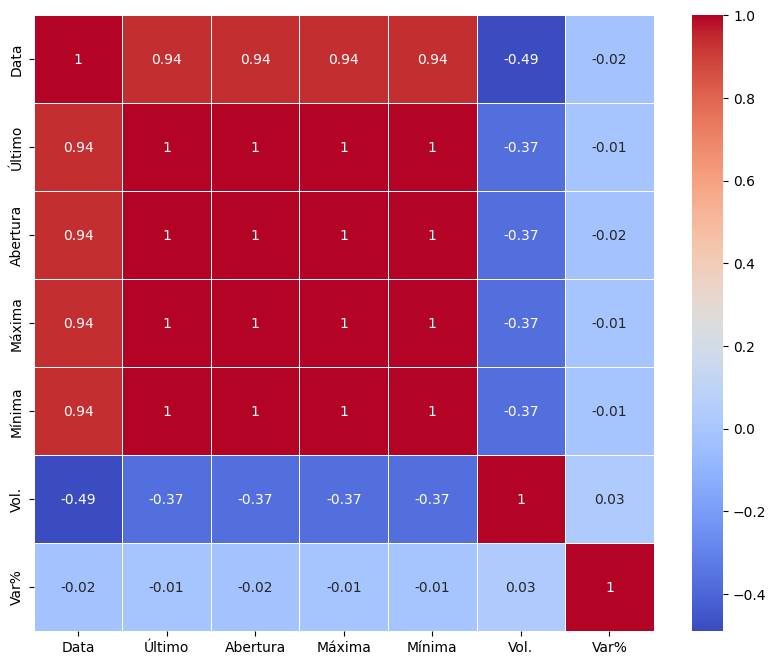

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_ibovespa['Var%'] = df_ibovespa['Var%'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float) / 100

correlation_metrics = df_ibovespa.corr().round(2)

fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(correlation_metrics, annot=True,linewidths= .5, ax=ax, cmap="coolwarm")

plt.show()

In [5]:
df_ibovespa.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

#Iniciando o modelo

In [6]:
from sklearn import metrics
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_cross_validation_metric
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

Importing plotly failed. Interactive plots will not work.


In [7]:
df_ibovespa.rename(columns={'Data': 'ds', 'Último': 'y'}, inplace=True)
df_ibovespa.head()

,ds,y,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-06-30,138.855,136.865,139.103,136.430,7.680000e+09,0.0145
1,2025-06-27,136.866,137.113,137.209,136.469,6.240000e+09,-0.0018
2,2025-06-26,137.114,135.767,137.353,135.756,8.020000e+09,0.0099
3,2025-06-25,135.767,137.163,137.163,135.565,7.710000e+09,-0.0102
4,2025-06-24,137.165,136.552,138.156,136.254,8.080000e+09,0.0045


In [8]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675 entries, 0 to 7674
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        7675 non-null   datetime64[ns]
 1   y         7675 non-null   object        
 2   Abertura  7675 non-null   object        
 3   Máxima    7675 non-null   object        
 4   Mínima    7675 non-null   object        
 5   Vol.      7674 non-null   float64       
 6   Var%      7675 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 419.9+ KB


In [9]:
df_ibovespa.set_index('ds', inplace=True)

df_ibovespa.reset_index(inplace=True)

train_set = df_ibovespa.iloc[:-30]

test_set = df_ibovespa.iloc[-30:]

m = Prophet()

m.fit(df_ibovespa)

19:08:43 - cmdstanpy - INFO - Chain [1] start processing
19:08:46 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=60, freq='B')

forecast = m.predict(future)

### Apresentando os resultados
Período de 04/07/1994 - Implementação do Plano Real - a 26/07/2025


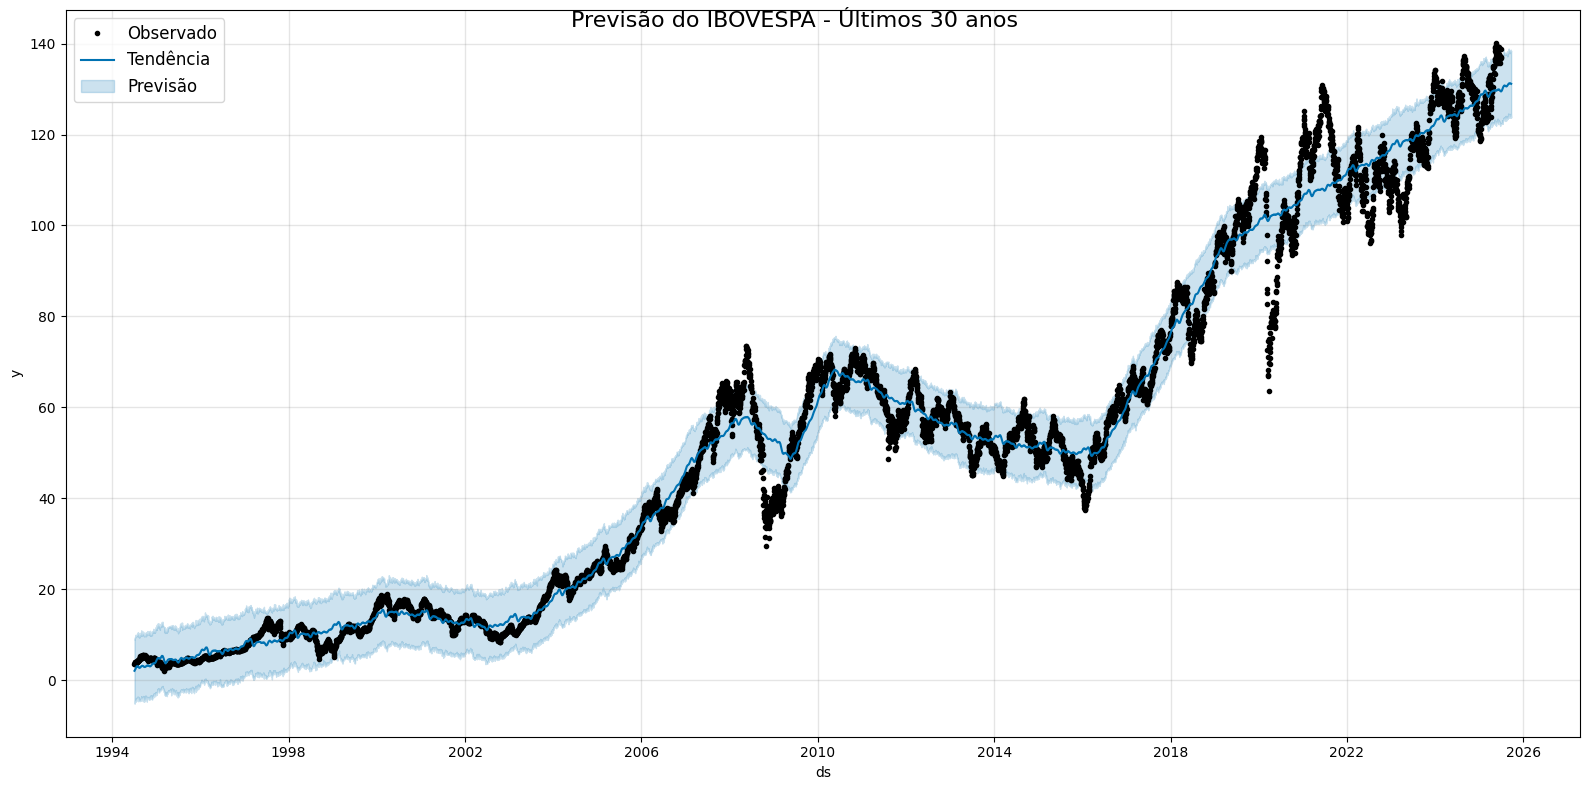

In [11]:
fig = m.plot(forecast, figsize=(16, 8))
fig.suptitle('Previsão do IBOVESPA - Últimos 30 anos', fontsize=16)
plt.legend(['Observado', 'Tendência', 'Previsão'],
  loc='upper left', fontsize=12)

In [ ]:
import numpy as np
import pandas as pd

df_ibovespa['ds'] = pd.to_datetime(df_ibovespa['ds'], errors='coerce')
forecast['ds'] = pd.to_datetime(forecast['ds'], errors='coerce')

df_ibovespa = df_ibovespa.dropna(subset=['ds'])
forecast = forecast.dropna(subset=['ds'])

data_corte = df_ibovespa['ds'].max()

forecast_future_30 = forecast[
    (forecast['ds'] > data_corte) &
    (forecast['ds'] <= data_corte + pd.Timedelta(days=30))
].copy().reset_index(drop=True)

last_real = float(df_ibovespa.loc[df_ibovespa['ds'] == data_corte, 'y'].values[0])

forecast_future_30['yhat'] = pd.to_numeric(forecast_future_30['yhat'], errors='coerce')

forecast_future_30['prev'] = forecast_future_30['yhat'].shift(1)

forecast_future_30.loc[0, 'prev'] = last_real

forecast_future_30['prev'] = pd.to_numeric(forecast_future_30['prev'], errors='coerce')

forecast_future_30['Tendência'] = np.where(
    forecast_future_30['yhat'] > forecast_future_30['prev'],
    'Alta',
    'Baixa'
)

tabela = forecast_future_30[['ds', 'yhat', 'Tendência']]
tabela.columns = ['Data', 'Previsão_IBOVESPA', 'Tendência_Próximo_Dia']

print(tabela.to_string(index=False))



#Testando modelo #


In [13]:
m = Prophet()
m.fit(train_set)

19:08:47 - cmdstanpy - INFO - Chain [1] start processing
19:08:50 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_test = test_set[['ds']]  # só as datas
forecast_test = m.predict(future_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Valores reais
y_true = test_set['y'].values

# Previsões do modelo
y_pred = forecast_test['yhat'].values
import numpy as np

y_true = np.array(y_true, dtype='float64')
y_pred = np.array(y_pred, dtype='float64')

# Métricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

MAE: 1.499967573829053
MSE: 2.556613474280853
RMSE: 1.5989413604885117
MAPE: 35.73%


In [ ]:
import numpy as np

y_true = np.array(y_true, dtype='float64')
y_pred = np.array(y_pred, dtype='float64')

# Calculando o MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 35.73%


In [17]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- Tratamento de datas ---
df_ibovespa['ds'] = pd.to_datetime(df_ibovespa['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Último valor real do IBOVESPA
last_real = df_ibovespa.loc[df_ibovespa['ds'] == df_ibovespa['ds'].max(), 'y'].values[0]

# Previsão dos próximos 30 dias
data_corte = df_ibovespa['ds'].max()
forecast_future_30 = forecast[
    (forecast['ds'] > data_corte) &
    (forecast['ds'] <= data_corte + pd.Timedelta(days=30))
].copy().reset_index(drop=True)

# Valor do dia anterior (shift) e variação
forecast_future_30['prev'] = forecast_future_30['yhat'].shift(1)
forecast_future_30.loc[0, 'prev'] = last_real

forecast_future_30['prev'] = forecast_future_30['yhat'].shift(1)
forecast_future_30.loc[0, 'prev'] = float(last_real)
forecast_future_30['prev'] = forecast_future_30['prev'].astype(float)

forecast_future_30['Tendência'] = np.where(
    forecast_future_30['yhat'] > forecast_future_30['prev'],
    'Subir',
    'Descer'
)

forecast_future_30['Variação_%'] = ((forecast_future_30['yhat'] - forecast_future_30['prev']) / forecast_future_30['prev']) * 100

tabela = forecast_future_30[['ds', 'yhat', 'Tendência', 'Variação_%']].copy()
tabela.columns = ['Data', 'Previsão_IBOVESPA', 'Tendência_Próximo_Dia', 'Variação_%']
tabela['Previsão_IBOVESPA'] = tabela['Previsão_IBOVESPA'].round(4)
tabela['Variação_%'] = tabela['Variação_%'].round(2)

print("\n📈 Previsões dos próximos 30 dias:\n")
print(tabela.to_string(index=False))
print(type(last_real))  # útil pra garantir que não está como string


📈 Previsões dos próximos 30 dias:

      Data  Previsão_IBOVESPA Tendência_Próximo_Dia  Variação_%
2025-07-01           129.4806                Descer       -6.75
2025-07-02           129.5214                 Subir        0.03
2025-07-03           129.5407                 Subir        0.01
2025-07-04           129.5521                 Subir        0.01
2025-07-07           129.6491                 Subir        0.07
2025-07-08           129.7261                 Subir        0.06
2025-07-09           129.8140                 Subir        0.07
2025-07-10           129.8773                 Subir        0.05
2025-07-11           129.9290                 Subir        0.04
2025-07-14           130.1165                 Subir        0.14
2025-07-15           130.2115                 Subir        0.07
2025-07-16           130.3108                 Subir        0.08
2025-07-17           130.3786                 Subir        0.05
2025-07-18           130.4278                 Subir        0.04
2025

C:\Users\Micro\AppData\Local\Temp\ipykernel_17072\341576529.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '138.855' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  forecast_future_30.loc[0, 'prev'] = last_real



🔍 Métricas de desempenho do modelo:
MAE:  1.50
MSE:  2.56
RMSE: 1.60
MAPE: 35.73%


19:08:50 - cmdstanpy - INFO - Chain [1] start processing
19:08:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Micro\AppData\Local\Temp\ipykernel_17072\641022491.py:41: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Micro\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


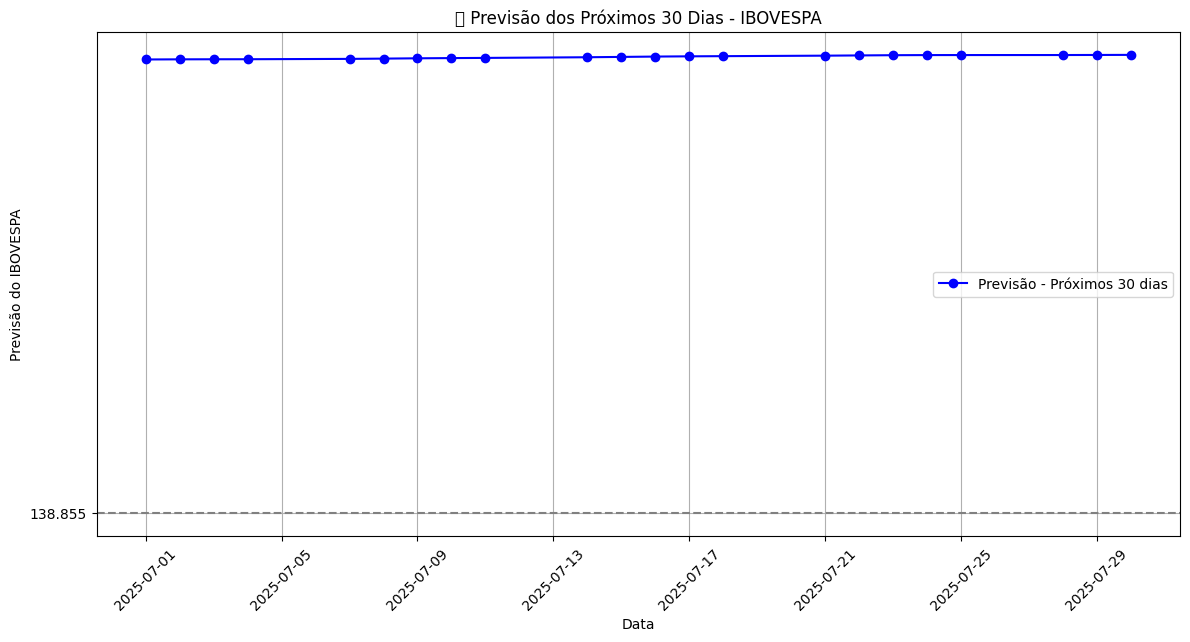

C:\Users\Micro\AppData\Local\Temp\ipykernel_17072\641022491.py:78: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Micro\AppData\Local\Temp\ipykernel_17072\641022491.py:78: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Micro\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Micro\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


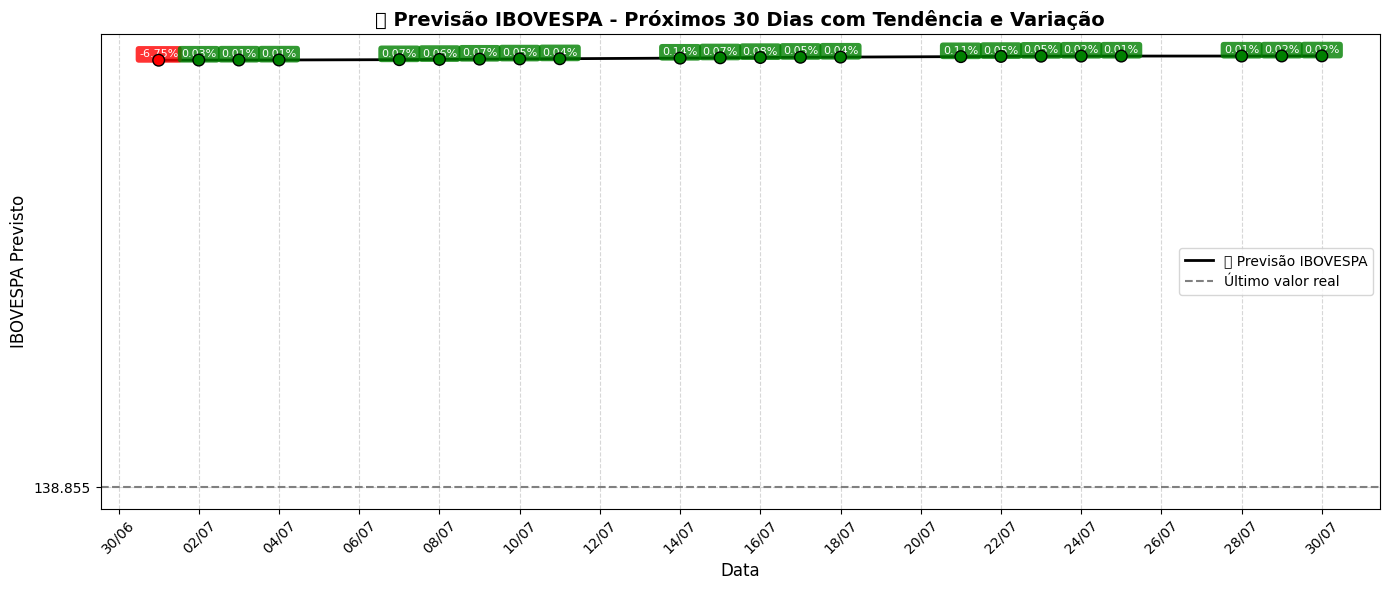

In [18]:

# --- Avaliação do modelo ---
y_true = y_true.astype(float)
y_pred = y_pred.astype(float)

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("\n🔍 Métricas de desempenho do modelo:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


m = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # opcional
m.fit(train_set)

import matplotlib.pyplot as plt

data_limite = df_ibovespa['ds'].max() - pd.Timedelta(days=30)

df_real_3m = df_ibovespa[df_ibovespa['ds'] >= data_limite]
forecast_3m = forecast[forecast['ds'] >= data_limite]

#--- Gráfico da Previsão Futura (Próximos 30 dias) ---
plt.figure(figsize=(12, 6))
plt.plot(forecast_future_30['ds'], forecast_future_30['yhat'], label='Previsão - Próximos 30 dias', color='blue', marker='o')
plt.title('📆 Previsão dos Próximos 30 Dias - IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Previsão do IBOVESPA')
plt.grid(True)
plt.legend()
plt.axhline(y=last_real, color='gray', linestyle='--', label='Último valor real')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
# Mapa de cores baseado na tendência
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Linha principal
ax.plot(forecast_future_30['ds'], forecast_future_30['yhat'], color='black', linewidth=2, label='📈 Previsão IBOVESPA')

# Pontos coloridos por tendência
cores = forecast_future_30['Tendência'].map({'Subir': 'green', 'Descer': 'red'})
ax.scatter(forecast_future_30['ds'], forecast_future_30['yhat'], color=cores, s=70, edgecolor='black', zorder=5)

# Último valor real
ax.axhline(y=last_real, color='gray', linestyle='--', linewidth=1.5, label='Último valor real')

# Rótulos de variação com caixinha
for i, row in forecast_future_30.iterrows():
    ax.text(row['ds'], row['yhat'] + 0.25, f"{row['Variação_%']:.2f}%",
            ha='center', va='bottom', fontsize=8, color='white',
            bbox=dict(boxstyle='round,pad=0.3', facecolor=cores[i], edgecolor='none', alpha=0.8))

# Formatação de datas
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Títulos e rótulos
plt.title('📊 Previsão IBOVESPA - Próximos 30 Dias com Tendência e Variação', fontsize=14, weight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('IBOVESPA Previsto', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
%pip install statsmodels
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


p-valor ADF: 0.9201
A série não é estacionária. Aplicando diferenciação...


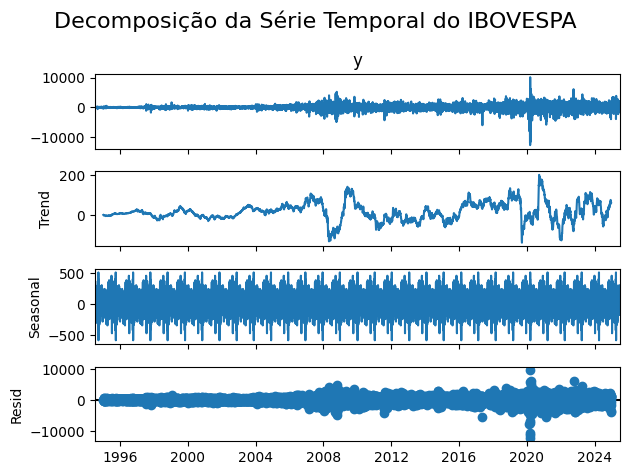

19:08:58 - cmdstanpy - INFO - Chain [1] start processing
19:08:58 - cmdstanpy - INFO - Chain [1] done processing


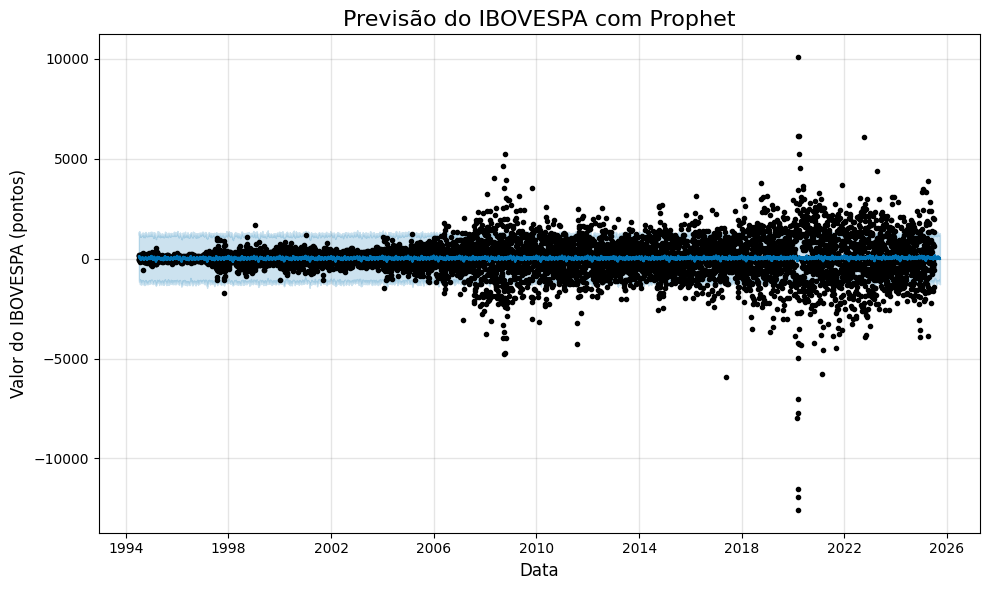

In [20]:
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from prophet.make_holidays import make_holidays_df

# 1. Renomeando colunas para o Prophet
df_ibovespa.rename(columns={'Data': 'ds', 'Último': 'y'}, inplace=True)

# 2. Converter coluna 'y' para tipo numérico (float)
df_ibovespa['y'] = df_ibovespa['y'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# 3. Ordenar do mais antigo para o mais recente
df_ibovespa = df_ibovespa.sort_values('ds').reset_index(drop=True)

# 4. Teste de Estacionariedade (ADF)
p_value = adfuller(df_ibovespa['y'])[1]
print(f'p-valor ADF: {p_value:.4f}')
if p_value > 0.05:
    print("A série não é estacionária. Aplicando diferenciação...")
    df_ibovespa['y'] = df_ibovespa['y'].diff()
    df_ibovespa = df_ibovespa.dropna()

# 5. Visualização da decomposição
result = seasonal_decompose(df_ibovespa.set_index('ds')['y'], model='additive', period=252)  # ~1 ano útil
result.plot()
plt.suptitle('Decomposição da Série Temporal do IBOVESPA', fontsize=16)
plt.tight_layout()
plt.show()

# 6. Criar feriados nacionais do Brasil
holidays = make_holidays_df(year_list=range(1994, 2026), country='BR')

# 7. Instanciar e treinar o modelo Prophet com sazonalidades e feriados
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays
)
m.fit(df_ibovespa)

# 8. Criar datas futuras e prever
future = m.make_future_dataframe(periods=60, freq='B')
forecast = m.predict(future)

# 9. Exibir gráfico com título em português e eixos traduzidos
fig1 = m.plot(forecast)

# Personalizações
ax = fig1.gca()
ax.set_title("Previsão do IBOVESPA com Prophet", fontsize=16)
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("Valor do IBOVESPA (pontos)", fontsize=12)

# Ajustar cores das linhas
for line in ax.get_lines():
    if line.get_label() == 'trend':
        line.set_color('green')
    elif line.get_label() == 'yhat':
        line.set_color('blue')

plt.tight_layout()
plt.show()
